In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [49]:
data = pd.read_csv( "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [50]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [52]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

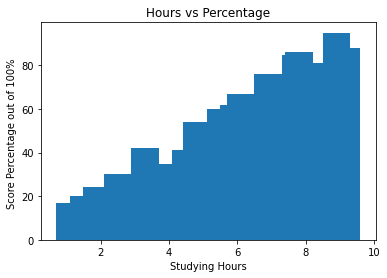

In [53]:
plt.bar(x=data['Hours'] , height=data['Scores'] )
plt.title('Hours vs Percentage')  
plt.xlabel('Studying Hours')  
plt.ylabel('Score Percentage out of 100% ') 
plt.show()

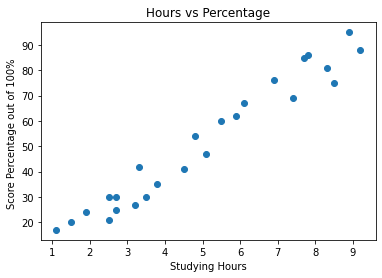

In [54]:
plt.scatter( data['Hours'],data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Studying Hours')  
plt.ylabel('Score Percentage out of 100% ') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'check outliers of Hours')

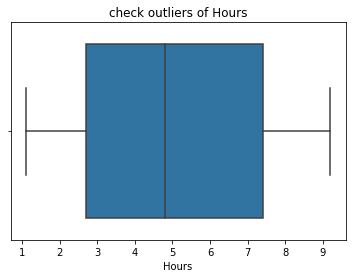

In [55]:
sns.boxplot(data['Hours'])
plt.title('check outliers of Hours')  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'check outliers of scores')

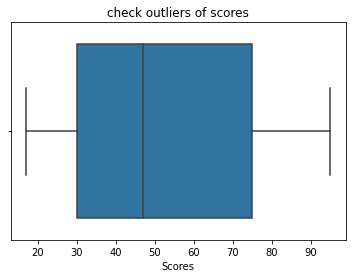

In [56]:
sns.boxplot(data['Scores'])
plt.title('check outliers of scores')  


In [57]:
x = data.drop('Scores',axis=1)
y = data['Scores']

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin = LinearRegression( )
lin.fit(x_train,y_train)
pred = lin.predict(x_test) 
print(mean_absolute_error( y_test, pred))


4.425394675156182


In [60]:
from sklearn.model_selection import cross_val_score
scores1=cross_val_score(lin, x, y,scoring='neg_mean_absolute_error' ,cv=10 )
scores1.mean()

-5.482931040713107

In [66]:
print(f"The predicted score when the student studying 9.25 hour/day is : {lin.predict([[9.25]])}")


The predicted score when the student studying 9.25 hour/day is : [92.33571987]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
